# Network Analysis

## Importing libraries

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from statistics import mean, stdev
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
from operator import itemgetter


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Creating our real world network


In [ ]:
G = nx.read_edgelist("edges.csv", delimiter=',', create_using=nx.DiGraph)

## Functions to show plot

In [ ]:
def dist_plot(data, title):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    #plot_list = []
    #labels = []
    for k, v in data.items():
        #plot_list.append(v["list"])
        #labels.append(v["name"])
        sns.distplot(v["list"], label=v["name"], hist=False)
    
    
    #plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("Density", fontsize=fontsize)
    plt.title(title + " Density Plot", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    #plt.xscale("linear")
    #plt.yscale("linear")
    
    plt.xlim([0, 2*10**2])
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel(title, fontsize=fontsize)
    plt.title(title+" Box Plot", fontsize=fontsize)
    #plt.title(name + " in 24 hours", fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.yscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()


## Exploring the characteristics of RW network

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 18002
Number of edges: 70639
Average in degree:   3.9240
Average out degree:   3.9240


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.00021798527271389785


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('Casting', 583)
('Lyrics', 327)
('Video game', 279)
('Episode', 276)
('United States', 246)
('Season', 241)
('Definition', 220)
('Recipe', 217)
('Flight', 201)
('Job', 195)
('Download', 182)
('Car', 167)
('Net worth', 157)
('Company', 151)
('How-to', 150)
('Actor', 147)
('Airport', 147)
('Symptom', 143)
('Hotel', 142)
('Book', 138)


In [ ]:
test_path = nx.shortest_path(G, source="Casting", target="Lyrics")

print("Shortest path between Casting and Lyrics:", test_path)
print("Number of edges of that path:", len(test_path)-1)


Shortest path between Casting and Lyrics: ['Casting', 'Casting Crowns', 'Lyrics']
Number of edges of that path: 2


In [ ]:
print("Number selfloops:",nx.number_of_selfloops(G))

Number selfloops: 32


In [ ]:
print("Avg Clustering coefficient:",nx.average_clustering(G))

Avg Clustering coefficient: 0.16746225750780805


In [ ]:
print("Strongly:",nx.is_strongly_connected(G))
print("Weakly:",nx.is_weakly_connected(G))

Strongly: False
Weakly: False


## Creating different models
Every time we run these cells the models are created differently.


DO NOT RUN, just UPLOAD from the following cell


In [ ]:
in_degree_sequence = [d for n, d in G.in_degree()]  
out_degree_sequence = [d for n, d in G.out_degree()]
cm = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence) #Create Directed Configuration Model
cm=nx.DiGraph(cm) 

In [ ]:
ws = nx.watts_strogatz_graph(G.number_of_nodes(), 8, 0.5)

In [ ]:
er = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), directed=True) #Erdős-Rényi graph

In [ ]:
ba = nx.barabasi_albert_graph(G.number_of_nodes(), 4) #Barabási–Albert graph

### Saving models

In [ ]:
nx.write_graphml(G, "G.graphml")
nx.write_graphml(er, "ER.graphml")
nx.write_graphml(cm, "CM.graphml")
nx.write_graphml(ba, "BA.graphml")
nx.write_graphml(ws, "WS.graphml")

In [ ]:
from google.colab import files
files.download('G.graphml')
files.download('ER.graphml')
files.download('CM.graphml')
files.download('BA.graphml')
files.download('WS.graphml')

### UPLOAD old models

In [ ]:
G=nx.read_graphml("G.graphml")
er=nx.read_graphml("ER.graphml")
ws=nx.read_graphml("WS.graphml")
cm=nx.read_graphml("CM.graphml")
ba=nx.read_graphml("BA.graphml")

### Checking nodes and edges of every network

In [ ]:
print("CM nodes:",cm.number_of_nodes())
print("CM edges:",cm.number_of_edges())
print("ER nodes:",er.number_of_nodes())
print("ER edges:",er.number_of_edges())
print("WS nodes:",ws.number_of_nodes())
print("WS edges:",ws.number_of_edges())
print("BA nodes:",ba.number_of_nodes())
print("BA edges:",ba.number_of_edges())

CM nodes: 18002
CM edges: 70573
ER nodes: 18002
ER edges: 70639
WS nodes: 18002
WS edges: 72008
BA nodes: 18002
BA edges: 71992


## Connected components



For the purposes of studying the connected components, we treated the networks as undirected

In [ ]:
print("Connected components: ")

print("ER network: " +str(nx.number_connected_components(er.to_undirected())))
print("BA network: " +str(nx.number_connected_components(ba)))
print("CM network: " +str(nx.number_connected_components(cm.to_undirected())))
print("WS network: " +str(nx.number_connected_components(ws)))
print("Real world network: "+ str(nx.number_connected_components(G.to_undirected())))
print("\n")
print("Real world network weakly components: "+ str(nx.number_weakly_connected_components(G)))
print("Real world network strongly components: "+ str(nx.number_strongly_connected_components(G)))

Connected components: 
ER network: 6
BA network: 1
CM network: 1
WS network: 1
Real world network: 2


Real world network weakly components: 2
Real world network strongly components: 3865


In [ ]:
print("ER weakly components: "+ str(nx.number_weakly_connected_components(ER)))
print("CM weakly components: "+ str(nx.number_weakly_connected_components(CM)))

ER weakly components: 9
CM weakly components: 1


In [ ]:
print("ER strongly components: "+ str(nx.number_strongly_connected_components(ER)))
print("CM strongly components: "+ str(nx.number_strongly_connected_components(CM)))

ER strongly components: 731
CM strongly components: 3765


# Shortest Paths


Takes a lot of time, run only if necessary

This is for directed graph like our graph and er.


In [ ]:
for nodes in nx.weakly_connected_components(G):
    subgraph = nx.subgraph(G, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    G_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%G_path)

Number of Nodes: 17996
Average Shortest Path: 7
Number of Nodes: 6
Average Shortest Path: 0


In [ ]:
for nodes in nx.weakly_connected_components(cm):
    subgraph = nx.subgraph(cm, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    cm_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%cm_path)

Number of Nodes: 18002
Average Shortest Path: 6


In [ ]:
for nodes in nx.weakly_connected_components(er):
    subgraph = nx.subgraph(er, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    er_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%er_path)

Number of Nodes: 17996
Average Shortest Path: 6
Number of Nodes: 1
Average Shortest Path: 0
Number of Nodes: 2
Average Shortest Path: 0
Number of Nodes: 1
Average Shortest Path: 0
Number of Nodes: 1
Average Shortest Path: 0
Number of Nodes: 1
Average Shortest Path: 0


This is for undirected models like ws, ba

In [ ]:
for nodes in nx.connected_components(ba):
    subgraph = nx.subgraph(ba, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    ba_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ba_path)

Number of Nodes: 18002
Average Shortest Path: 4


In [ ]:
for nodes in nx.connected_components(ws):
    subgraph = nx.subgraph(ws, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    ws_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ws_path)

Number of Nodes: 18002
Average Shortest Path: 5


## Density

In [ ]:
print("Densities: ")

G_cc = nx.density(G)
print("Real world network: "+str(G_cc))
er_net_cc = nx.density(er)
print("ER network: "+str(er_net_cc))
ba_cc = nx.density(ba)
print("BA network: "+str(ba_cc))
ws_cc = nx.density(ws)
print("WS network: "+str(ws_cc))
cm_cc = nx.density(cm)
print("CM network: "+str(cm_cc))

Densities: 
Real world network: 0.00021798527271389785
ER network: 0.00021798527271389785
BA network: 0.00044432100548475866
WS network: 0.0004444197544580857
CM network: 0.00021778160295641096


## Degree Distribution

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
print("Maximum degree:",dmax)

Maximum degree: 583


In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmin = min(degree_sequence)
print("Minimum degree:",dmin)

Minimum degree: 1


In [ ]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"), (ws, "Watts Strogatz"), (cm, "Configuration Model")]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


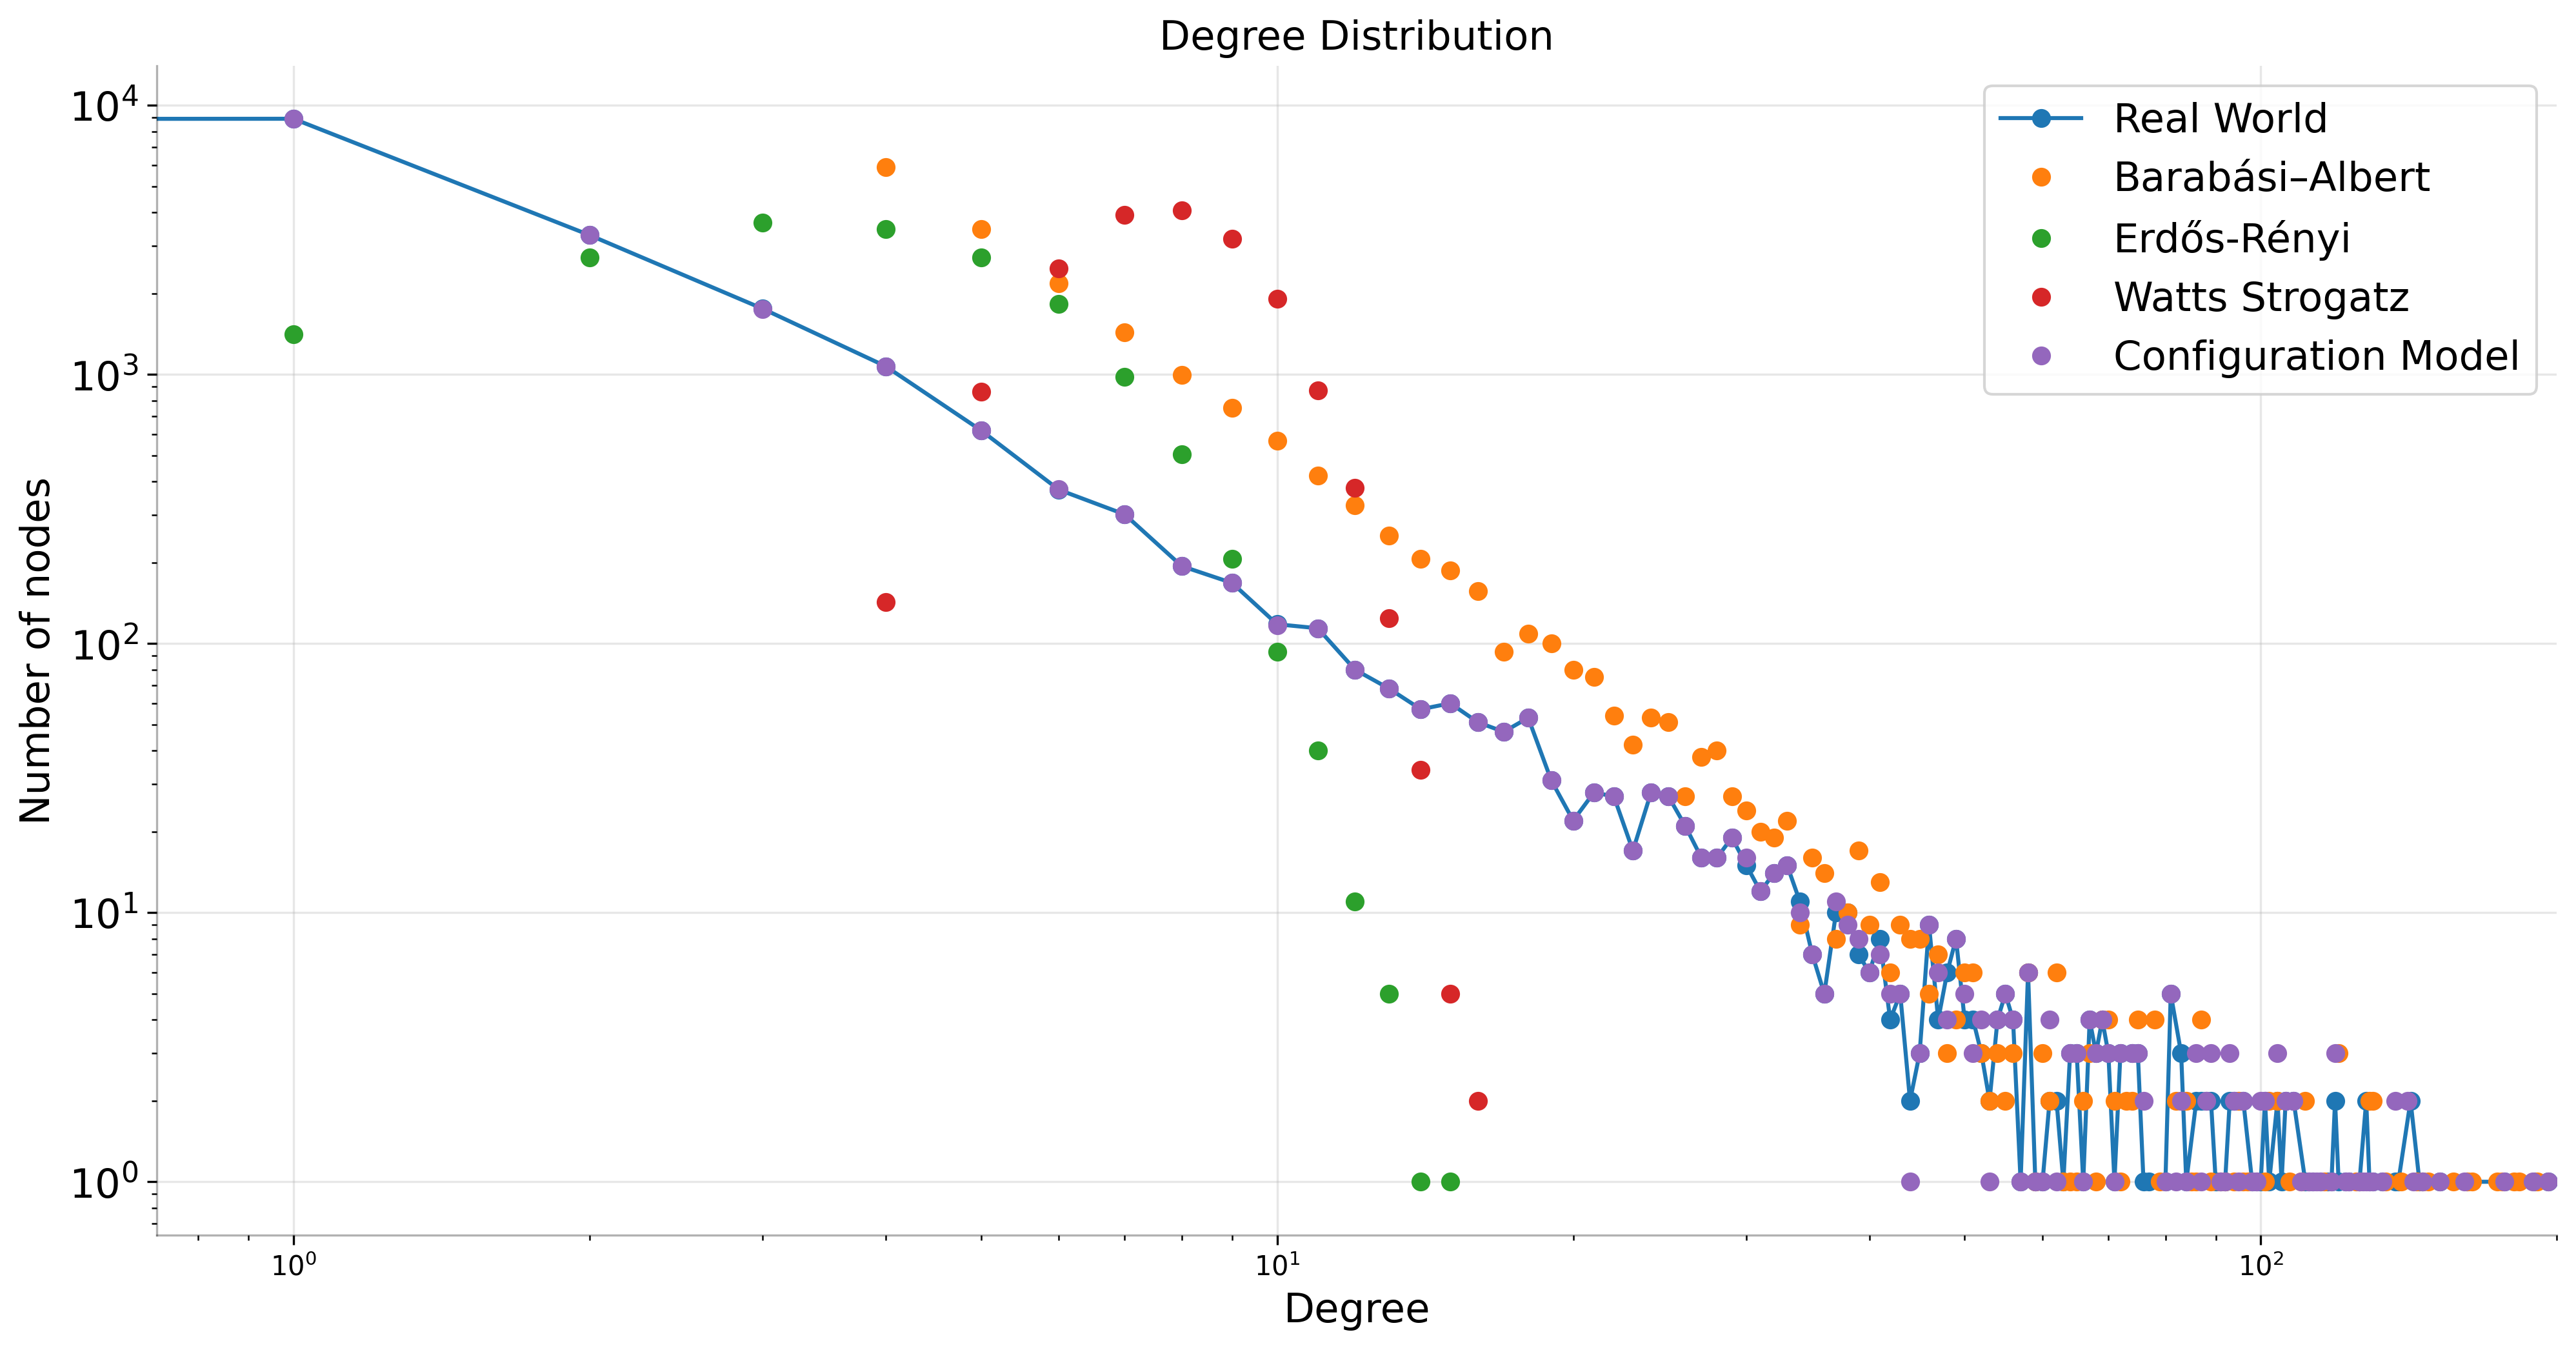

In [ ]:
degree_dist_plot(graphs)

The real world degree distribution is very similar to configuration model

## Average clustering coefficient

In [ ]:
G_cc = nx.average_clustering(G)
print('Real world average cluster coefficient: ' + str(G_cc) + '\n')
er_net_cc = nx.average_clustering(er)
print('Random network average cluster coefficient: ' + str(er_net_cc) + '\n')
ba_net_cc = nx.average_clustering(ba)
print('Barabasi Albert network average cluster coefficient: ' + str(ba_net_cc) + '\n')
ws_net_cc = nx.average_clustering(ws)
print('WS network average cluster coefficient: ' + str(ws_net_cc) + '\n')
cm_net_cc = nx.average_clustering(cm)
print('CM network average cluster coefficient: ' + str(cm_net_cc) + '\n')

Real world average cluster coefficient: 0.16746225750780805

Random network average cluster coefficient: 0.00020774811263776536

Barabasi Albert network average cluster coefficient: 0.004606931612398976

WS network average cluster coefficient: 0.08175425193256526

CM network average cluster coefficient: 0.001260550626433115



## Clustering coefficient distribution

In [ ]:
clustering_g = nx.clustering(G)
clustering_er = nx.clustering(er)
clustering_ba = nx.clustering(ba)
clustering_ws = nx.clustering(ws)
clustering_cm = nx.clustering(cm)

In [ ]:
data = [[min(clustering_g.values()),min(clustering_er.values()),min(clustering_ba.values()), min(clustering_ws.values()), min(clustering_cm.values())]        
        ,[max(clustering_g.values()),max(clustering_er.values()),max(clustering_ba.values()), max(clustering_ws.values()), max(clustering_cm.values())]
        ,[mean(clustering_g.values()),mean(clustering_er.values()),mean(clustering_ba.values()), mean(clustering_ws.values()), mean(clustering_cm.values())]
        ,[stdev(clustering_g.values()),stdev(clustering_er.values()),stdev(clustering_ba.values()), stdev(clustering_ws.values()), stdev(clustering_cm.values())]
        ]
print('Clustering Coefficient')
pd.DataFrame(data, columns=['Real World','Erdos-Renyi','Barabasi-Albert', 'WS', 'Configuration Model'],index=['min','max','mean','stdev'])


Clustering Coefficient


,Real World,Erdos-Renyi,Barabasi-Albert,WS,Configuration Model
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.083333,0.500000,0.833333,0.166667
mean,0.167462,0.000208,0.004607,0.081754,0.001261
stdev,0.172632,0.002302,0.023617,0.077705,0.005940


In [ ]:
clustering_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":list(clustering_er.values())
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":list(clustering_ws.values())
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":list(clustering_ba.values())
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":list(clustering_cm.values())
    }
}
real_world_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    }
}

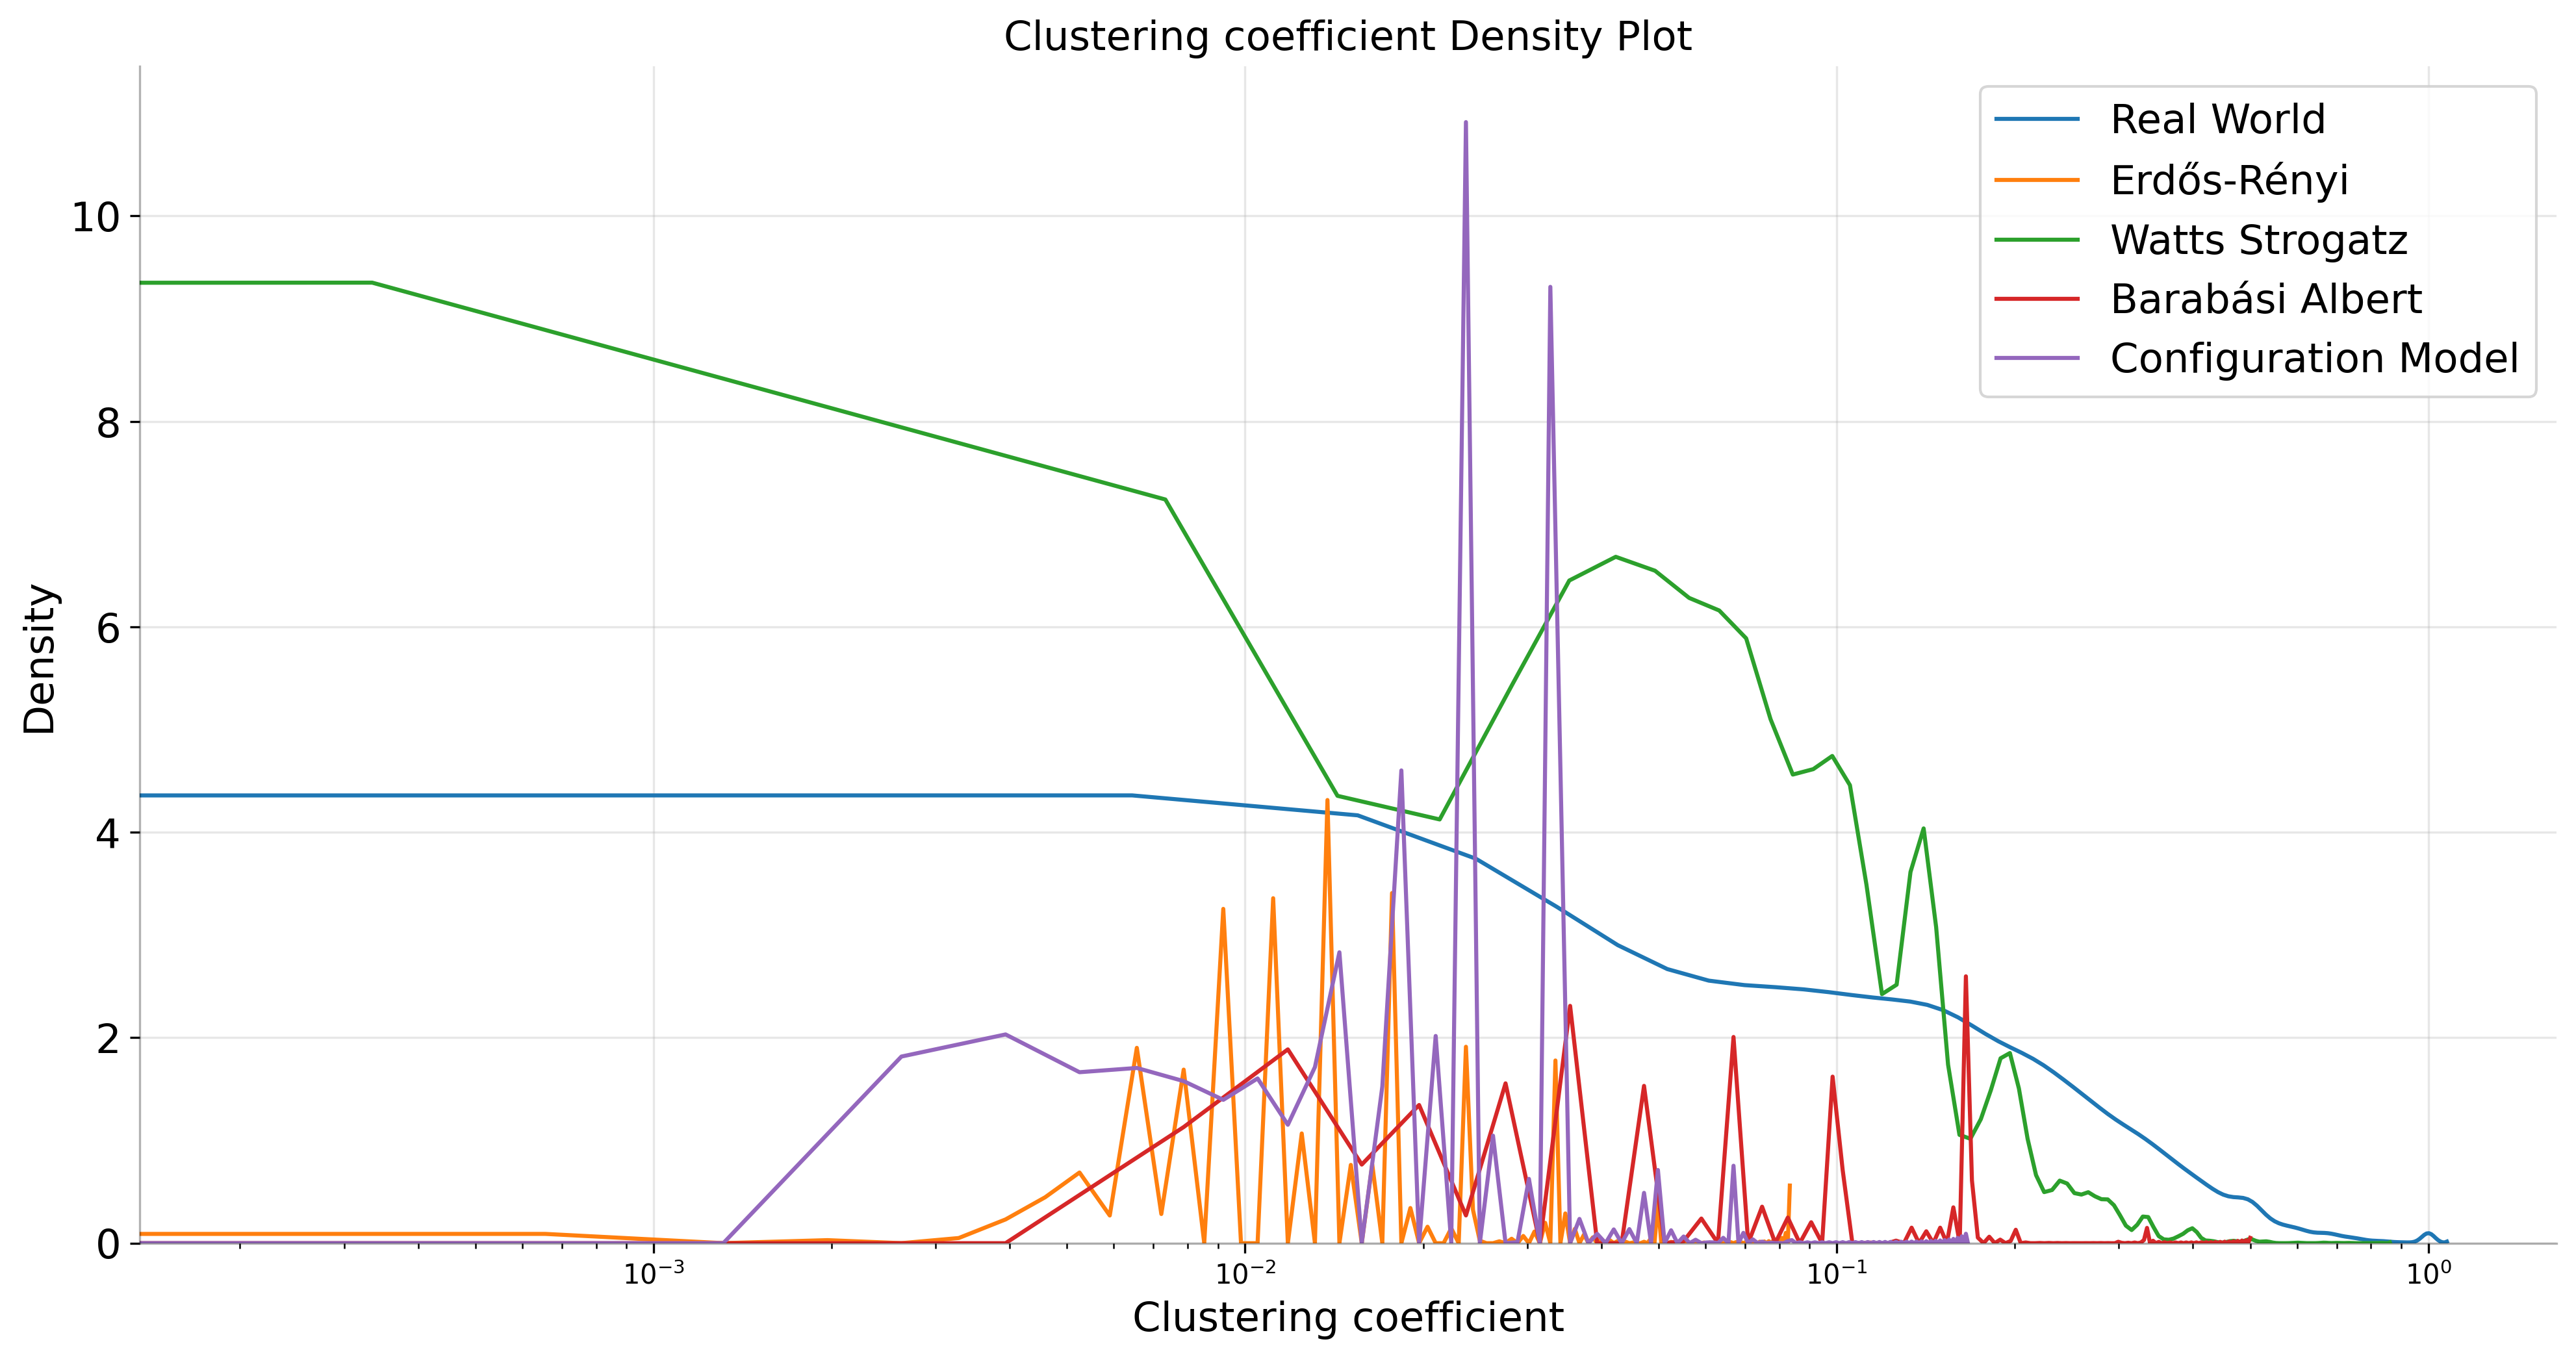

In [ ]:
dist_plot(clustering_coeff_data, "Clustering coefficient")